In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/lib64/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [9]:
train = pd.read_csv('./data/train.csv', na_values="-1")

In [3]:
features = { 'ind' : [], 'car' :[], 'calc':[], 'reg':[] }
datatypes = { 'cat':[], 'bin':[], 'cont':[] }
import re
for i in train.columns :
    for j in features.keys() :
        if j in i : features[j].append(i)
    for j in datatypes.keys() :
        if j in i : datatypes[j].append(i)
    
    if re.match(re.compile('^ps_[a-z]+_[0-9]+$'), i) :
        datatypes['cont'].append(i)
#---------------------------------------------------------
print "\n____________________\n"
print "number of features by feature type :\n____________________\n"
for i,j in features.items() :
    print i, "\t:\t",len(j)
print "\n____________________\n"
print "number of features by data type :\n____________________\n"

for i,j in datatypes.items() :
    print i, "\t:\t",len(j)


____________________

number of features by feature type :
____________________

ind 	:	18
car 	:	16
calc 	:	20
reg 	:	3

____________________

number of features by data type :
____________________

bin 	:	17
cont 	:	26
cat 	:	14


In [11]:

def printNull(col,names):
    global count
    try :
        p =  round(float(col.isnull().sum()) / train.shape[0] * 100.0,2)
        if p >= 30 : print "\t" ,names[count],' > ',p,"%"
    except:
        pass;
    count+=1

#------------------------------------------------
print "NaN values percentage if above 30% by featues : \n________________"
for i,j in features.items():
    print i,' >>'
    count = 0
    _ = train[j].apply(printNull, args=[j])
    print "-------"
#-------------------------
print "nNaN values percentage if above 30% by data types : \n________________"
for i,j in datatypes.items():
    print i,' >>'
    count = 0;
    _ = train[j].apply(printNull, args = [j])
    print "-------"

    
    
    
#_ = train[datatypes['cat']].apply(printNull, axis=0)

NaN values percentage if above 30% by featues : 
________________
ind  >>
-------
car  >>
	ps_car_03_cat  >  69.09 %
	ps_car_05_cat  >  44.78 %
-------
calc  >>
-------
reg  >>
-------
nNaN values percentage if above 30% by data types : 
________________
bin  >>
-------
cont  >>
-------
cat  >>
	ps_car_03_cat  >  69.09 %
	ps_car_05_cat  >  44.78 %
-------


Important Correlations


,ps_ind_12_bin,ps_ind_14,ps_reg_02,ps_reg_03
ps_ind_12_bin,NaN,0.890127,NaN,NaN
ps_ind_14,0.890127,NaN,NaN,NaN
ps_reg_02,NaN,NaN,NaN,0.742668
ps_reg_03,NaN,NaN,0.742668,NaN


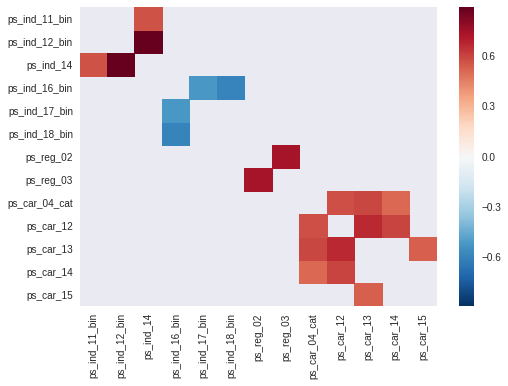

In [11]:
print "Important Correlations"
corrT = train.corr()
corrT[corrT == 1] = 0
corrT[corrT.abs() >= 0.7].dropna(how='all').dropna(how='all',axis=1)
sns.heatmap(corrT[corrT.abs() >= 0.5].dropna(how='all').dropna(how='all',axis=1))
del corrT

------------------------